### go with the video for more information
https://www.youtube.com/watch?v=RCmiPBiA4qg&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=13

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df =pd.read_csv("Admission_Predict.csv")

In [3]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
145,146,320,113,2,2.0,2.5,8.64,1,0.81
373,374,321,109,3,3.0,3.0,8.54,1,0.79
249,250,321,111,3,3.5,4.0,8.83,1,0.77
81,82,340,120,4,5.0,5.0,9.50,1,0.96
223,224,308,109,2,3.0,4.0,8.45,0,0.71


In [4]:
df.shape

(400, 9)

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['Serial No.'],inplace=True)

In [9]:
X=df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
41,316,105,2,2.5,2.5,8.20,1
180,300,104,3,3.5,3.0,8.16,0
132,309,105,5,3.5,3.5,8.56,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [16]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [17]:
X_test_scaled

array([[0.44      , 0.34615385, 0.5       , 0.625     , 0.75      ,
        0.65562914, 0.        ],
       [0.2       , 0.23076923, 0.5       , 0.25      , 0.5       ,
        0.61589404, 1.        ],
       [0.68      , 0.69230769, 0.75      , 0.75      , 0.625     ,
        0.65231788, 1.        ],
       [0.68      , 0.5       , 1.        , 0.625     , 0.75      ,
        0.61589404, 1.        ],
       [0.64      , 0.61538462, 0.75      , 0.75      , 1.        ,
        0.77152318, 1.        ],
       [0.36      , 0.46153846, 0.5       , 0.5       , 0.5       ,
        0.47682119, 0.        ],
       [0.4       , 0.46153846, 0.25      , 0.625     , 0.375     ,
        0.50662252, 0.        ],
       [0.2       , 0.30769231, 0.25      , 0.125     , 0.25      ,
        0.35430464, 0.        ],
       [0.4       , 0.19230769, 0.25      , 0.125     , 0.25      ,
        0.16556291, 0.        ],
       [1.        , 0.69230769, 0.75      , 1.        , 0.875     ,
        0.94701987, 1. 

In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(7,activation ='relu',input_dim =7))
model.add(Dense(7,activation ='relu'))
model.add(Dense(7,activation ='relu'))
model.add(Dense(1,activation ='linear'))

In [20]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 0s 25ms/step - loss: 0.5351 - accuracy: 0.0000e+00 - val_loss: 0.5495 - val_accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.0000e+00 - val_loss: 0.4640 - val_accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.0000e+00 - val_loss: 0.3493 - val_accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.0000e+00 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.0000e+00 - val_loss: 0.1036 - val_accuracy: 0.0000e+00
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.0000e+00 - val_loss: 0.0403 - val_accuracy: 0.0000e+00
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.0000e+00 - val_loss: 0.03

8/8 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 57/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 58/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 59/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 60/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 61/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 62/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 0.0052 - va

8/8 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 112/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 113/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 114/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 115/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 116/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 117/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.003

Epoch 166/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 167/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 168/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 169/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 170/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 171/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 172/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - v

Epoch 221/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 222/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 223/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 224/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 225/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 226/500
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 227/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - v

Epoch 276/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 277/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 278/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 279/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 280/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 281/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 282/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - v

Epoch 331/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 332/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 333/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 334/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 335/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 336/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 337/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - v

Epoch 386/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 387/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 388/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 389/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 390/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 391/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 392/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - v

Epoch 441/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 442/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 443/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 444/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 445/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 446/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 447/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - v

Epoch 496/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 497/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 498/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 499/500
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 500/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00


In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7637218791320496

In [25]:
import matplotlib.pyplot as plt

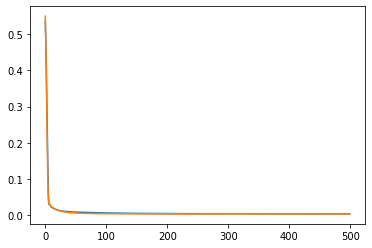

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])